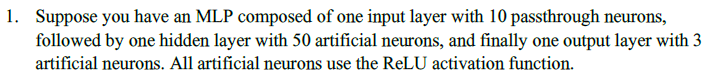

image.png

$$\mathbf{X} \rightarrow (10,1)$$

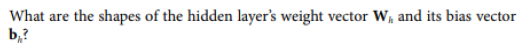

$$\mathbf{W}_h \rightarrow (10,50)$$
$$\mathbf{b}_h \rightarrow (50,1)$$

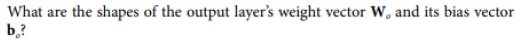

$$\mathbf{W}_o \rightarrow (50,3)$$
$$\mathbf{b}_o \rightarrow (3, 1)$$

image.png

$$\mathbf{Y} = \mathbf{W}_{o}^{\mathbf{T}}\mathbf{X}_h + \mathbf{b}_o \rightarrow (3, 1)$$ $$ $$

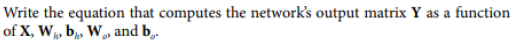

$\text{The shapes of all of the relevant matrices will be as follows:}$ $$$$
$$\mathbf{X} \rightarrow (10,1)$$
$$\mathbf{W}_h \rightarrow (10,50)$$
$$\mathbf{b}_h \rightarrow (50,1)$$
$$ $$
$$\mathbf{W}_o \rightarrow (50,3)$$
$$\mathbf{b}_o \rightarrow (3, 1)$$
$$ $$
$$\mathbf{X}_h = \mathbf{W}_{h}^{\mathbf{T}}\mathbf{X} + \mathbf{b}_h \rightarrow (50,1)$$ $$ $$
$$\mathbf{Y} = \mathbf{W}_{o}^{\mathbf{T}}\mathbf{X}_h + \mathbf{b}_o \rightarrow (3, 1)$$ $$ $$
$$\therefore \mathbf{Y} = \mathbf{W}_{o}^{\mathbf{T}}(\mathbf{W}_{h}^{\mathbf{T}}\mathbf{X} + \mathbf{b}_h)+ \mathbf{b}_o\rightarrow (3, 1)$$ $$ $$

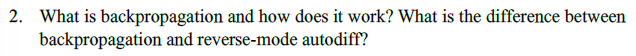

$\text{Backpropagation is using the error to calculate how much each weight contributed to the error by using the chain rule.}$

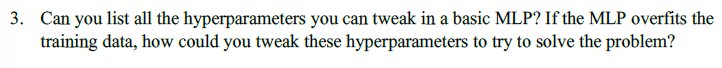

$\text{Some examples of hyperparameters to tweak in a MLP are: }$ $$ $$
$\bullet \text{Number of hidden layers}$ $$ $$
$\bullet \text{Number of nodes/neurons per layer}$ $$ $$
$\bullet \text{Learning rate}$ $$ $$
$\bullet \text{Number of training epochs}$ $$ $$
$\bullet \text{Batch size}$ $$ $$
$\bullet \text{Activation function}$ $$ $$
$\bullet \text{Optimizer}$ $$ $$

$\text{Some methds to prevent overfitting are: }$ $$ $$
$\bullet \text{Dropout}$ $$ $$
$\bullet \text{Regularization (L1/L2}$ $$ $$
$\bullet \text{Reduce model complexity (number of layers/nodes}$ $$ $$
$\bullet \text{Add more data (or data augmentation)}$ $$ $$
$\bullet \text{Cross validation}$ $$ $$
$\bullet \text{Early stopping}$ $$ $$

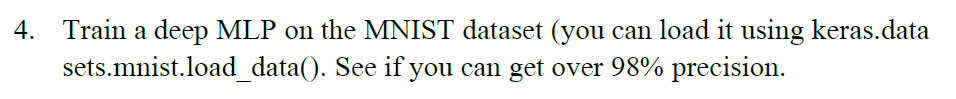

In [110]:
!pip install tensorflow keras numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [126]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [145]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [146]:
num_labels = len(np.unique(y_train))

In [148]:
image_size = x_train.shape[1]
input_size = image_size * image_size

In [149]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [150]:
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [151]:
print(f"x_train.shape = {x_train.shape}")
print(f"y_train.shape = {y_train.shape}")
print(f"x_test.shape = {x_test.shape}")
print(f"y_test.shape = {y_test.shape}")

x_train.shape = (60000, 784)
y_train.shape = (60000, 10)
x_test.shape = (10000, 784)
y_test.shape = (10000, 10)


In [153]:
batch_size = 128
hidden_units = 256
dropout = 0.45

In [154]:
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 256)               200960    
                                                                 
 activation_33 (Activation)  (None, 256)               0         
                                                                 
 dropout_22 (Dropout)        (None, 256)               0         
                                                                 
 dense_34 (Dense)            (None, 256)               65792     
                                                                 
 activation_34 (Activation)  (None, 256)               0         
                                                                 
 dropout_23 (Dropout)        (None, 256)               0         
                                                                 
 dense_35 (Dense)            (None, 10)              

In [155]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [156]:
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 5s 9ms/step - loss: 0.4260 - accuracy: 0.8683
Epoch 2/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1919 - accuracy: 0.9430
Epoch 3/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1529 - accuracy: 0.9541
Epoch 4/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1274 - accuracy: 0.9611
Epoch 5/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1148 - accuracy: 0.9654
Epoch 6/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1036 - accuracy: 0.9683
Epoch 7/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0954 - accuracy: 0.9709
Epoch 8/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0872 - accuracy: 0.9731
Epoch 9/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0793 - accuracy: 0.9749
Epoch 10/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0801 - accuracy: 0.974

In [158]:
_, acc = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=0)
print(f"Test accuracy: {acc*100.0:.2f}")

Test accuracy: 98.24
